# Practical 6
### Aim : Write a program to implement Decision Tree algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from collections import Counter
data = pd.read_csv('/content/drive/MyDrive/AI/tennis.csv')
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
import math
def Entropy(data,attribute=-1):
    totalValues = data.shape[0]
    if attribute == -1:
        values = Counter(data['play'].tolist())
        ans = 0
        for x in values.values():
            ans -= (x/totalValues) * math.log(x/totalValues,2)
        return ans
    else:
        values = Counter(data[attribute].tolist())
        lst = []
        for x,y in values.items():
            filter = data[data[attribute] == x]
            filterdata = Counter(filter['play'].tolist())
            ans = 0
            for m in filterdata.values():
                ans -= (m/y) * math.log(m/y,2)
            lst.append((x,y,ans))
        ans = 0
        #print(lst)
        for x,y,z in lst:
            ans -= (y/totalValues) * z
        return ans
def Gain(data,attribute):
    return Entropy(data) + Entropy(data,attribute)
def FindRoot(data,classification):
    attributes = data.columns.tolist()
    attributes.remove(classification)
    lst = []
    for x in attributes:
        lst.append((x,Gain(data,x)))
    lst.sort(key = lambda x:x[1],reverse = True)
    return lst[0]

In [ ]:
e = Entropy(data)
print("Entropy of entire dataset = ",e)

Entropy of entire dataset =  0.9402859586706309


In [ ]:
e = Entropy(data,'outlook')
print("Entropy of outlook = ",e)
e = Entropy(data,'temp')
print("Entropy of temp = ",e)
e = Entropy(data,'humidity')
print("Entropy of humidity = ",e)
e = Entropy(data,'windy')
print("Entropy of windy = ",e)

Entropy of outlook =  -0.6935361388961918
Entropy of temp =  -0.9110633930116763
Entropy of humidity =  -0.7884504573082896
Entropy of windy =  -0.8921589282623617


In [ ]:
g = Gain(data,'outlook')
print("Gain of outlook = ",g)
g = Gain(data,'temp')
print("Gain of temp = ",g)
g = Gain(data,'humidity')
print("Gain of humidity = ",g)
g = Gain(data,'windy')
print("Gain of windy = ",g)

Gain of outlook =  0.2467498197744391
Gain of temp =  0.029222565658954647
Gain of humidity =  0.15183550136234136
Gain of windy =  0.04812703040826927


In [ ]:
root = FindRoot(data,'play')
print("Root = ",root[0])
print("Gain of root = ",root[1])

Root =  outlook
Gain of root =  0.2467498197744391


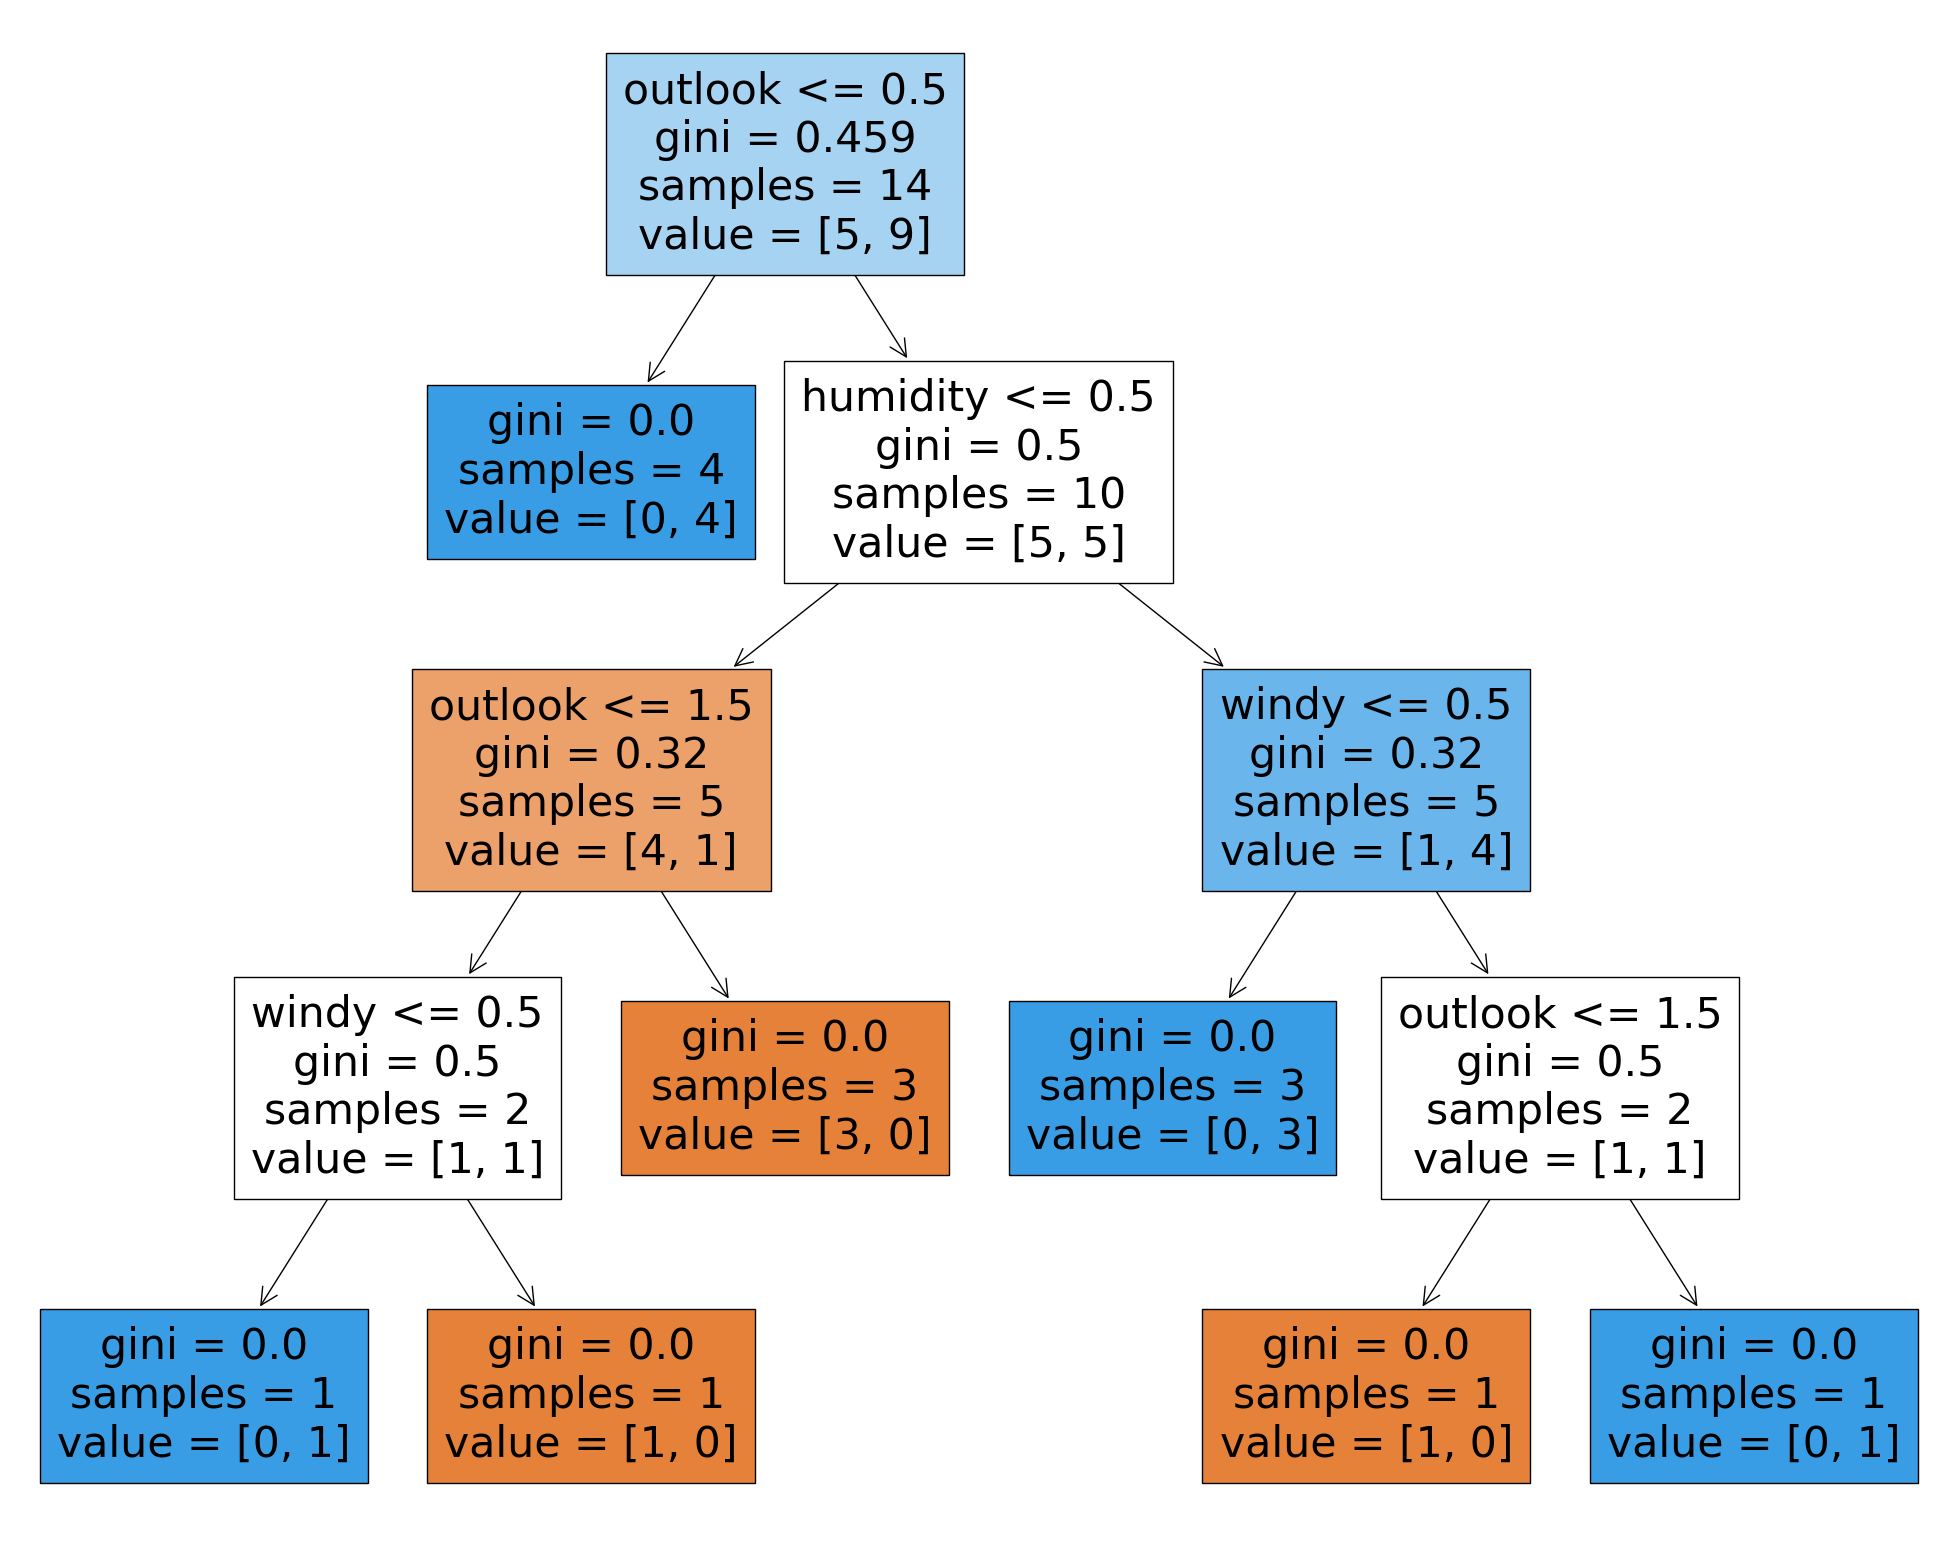

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

input = data.drop('play',axis='columns')
output = data['play']

outlook = LabelEncoder()
temp = LabelEncoder()
humidity = LabelEncoder()
wind = LabelEncoder()
play = LabelEncoder()

input['outlook'] = outlook.fit_transform(input['outlook'])
input['temp'] = temp.fit_transform(input['temp'])
input['humidity'] = humidity.fit_transform(input['humidity'])
input['windy'] = wind.fit_transform(input['windy'])

output = play.fit_transform(output)

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(input, output)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=input.columns,filled=True)